Sun, Keanna Louie


## Spam Classification Filter w/ Naive Bayes

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, scale

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

##### random module ######
import random

import os


#### email package ####
import email
from email import parser
from email import message

import string
import re

## Get folders for training and testing
Folders 0-70 are for training, the rest are testing

In [2]:
# Get path of main directory
abs_path = os.path.abspath('')

# lead to data folder
rel_path = "data"

# full directory path
path = os.path.join(abs_path, rel_path)

# get list of folders
folders = [i[0] for i in os.walk(path)]

# for training
training_folders = folders[1:72]

# for testing
testing_folders = folders[72:]

# Read each CSV file into DataFrame
# This creates a list of dataframes
#df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
#big_df   = pd.concat(df_list, ignore_index=True)


In [3]:
#training_csv_files = []
# getting the csv files
#for i in training_folders[:3]:
#    print(os.listdir(i))

### Opening stop words and labels files

In [4]:
# get stop words
with open("D:\\UPV\\Year 4\\CMSC 197 ML\\Lec6-ProblemSet\\stop_words.txt") as stop_file:
    stopwords = stop_file.read().splitlines()

In [5]:
with open("D:\\UPV\\Year 4\\CMSC 197 ML\\Lec6-ProblemSet\\labels") as labels_file:
    labels = labels_file.read().splitlines()

## Define functions for pre-processing

def get_email_body(file)
- getting the body of the email from MIME formatted file using email package


def clean_data(body)
- split email body into list of words
- remove the non alphanumeric characters, punctuations from each word
- also remove empty words from the list


def remove_stop_words(list_of_words):
- using the stop words file opened earlier, remove the stop words from the cleaned list of words


def count_ocurrences(list_of_words):
- make the list of words into a dataframe, and combine it into the existing dataframe for counting ocurrences
- identify whether the email is considered as spam or ham


NOTE: make separate global dataframes for spam and ham counts

In [6]:
def get_email_body(file):
    msg = email.message_from_file(f)
    body = msg.get_payload()
    return body

In [7]:
def clean_data(body):
    # get payload may return a stirng or a list of Message objects which usually contain only 1
    if type(body) == str:
        list_words = body.split()
    else:
        new_body = body[0]
        list_words = new_body.as_string().split()
    
    # remove words that were repeated and make them all in lower case
    #list_words = list(dict.fromkeys(list_words))
    #list_words = [x.lower() for x in list_words]
    
    
    for i in range(len(list_words)):
        # replace word in the list with its clean version
        list_words[i] = re.sub(r'\W+', '', list_words[i].translate(list_words[i].maketrans('', '', string.punctuation)).lower())
    # remove empty items
    new_list = [word for word in list_words if len(word) != 0]
    return new_list

In [8]:
def remove_stop_words(word_list):
    global stopwords
    for word in word_list.copy():
        if word in stopwords:
            word_list.remove(word)
    return word_list

In [9]:
def count_ocurrences(word_list, label):
    global spam_count_df
    global ham_count_df
    
    # make the list of words into a df with its count
    word_df = pd.value_counts(np.array(word_list)).rename_axis('Word').reset_index(name='temp_count')
    
    # check if spam or ham
    if label == "spam":
        # make copy of current spam count df
        temp_df = spam_count_df.copy()
        spam_count_df = temp_df.merge(word_df, on="Word", how="outer").fillna(0)
        spam_count_df.Count = spam_count_df.Count + spam_count_df.temp_count
        spam_count_df.drop("temp_count", axis=1, inplace=True)
    else:
        # make copy of current ham count df
        temp_df = ham_count_df.copy()
        ham_count_df = temp_df.merge(word_df, on="Word", how="outer").fillna(0)
        ham_count_df.Count = ham_count_df.Count + ham_count_df.temp_count
        ham_count_df.drop("temp_count", axis=1, inplace=True)
        
    

In [10]:
# this is for if we want to combine the spam and ham emails
def count_ocurrences1(word_list):
    global count_df

    # make the list of words into a df with its count
    word_df = pd.value_counts(np.array(word_list)).rename_axis('Word').reset_index(name='temp_count')
    
    # make copy of current spam count df
    temp_df = count_df.copy()
    count_df = temp_df.merge(word_df, on="Word", how="outer").fillna(0)
    count_df.Count = count_df.Count + count_df.temp_count
    count_df.drop("temp_count", axis=1, inplace=True)


In [69]:
def count_ocurrences2(word_list, count_df):

    # make the list of words into a df with its count
    word_df = pd.value_counts(np.array(word_list)).rename_axis('Word').reset_index(name='temp_count')
    
    # make copy of current spam count df
    temp_df = count_df.copy()
    count_df = temp_df.merge(word_df, on="Word", how="outer").fillna(0)
    count_df.Count = count_df.Count + count_df.temp_count
    count_df.drop("temp_count", axis=1, inplace=True)
    
    return count_df

## Loop for Pre-processing

Call the defined fucntions above for each email file

In [11]:
# combined ham and spam count words
count_df = pd.DataFrame(columns=["Word", "Count"])

In [12]:
# DELETE

# initialize spam and ham count dataframes to hold word counts
#spam_count_df = pd.DataFrame(columns=["Word", "Count"])
#ham_count_df = pd.DataFrame(columns=["Word", "Count"])

In [13]:
for folder in training_folders:
    email_files = os.listdir(folder)
    
    for i in range(len(email_files)):
        # get path of current email file
        file_path = os.path.join(folder, email_files[i])
        print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='ignore')
        
        # getting email body and cleaning
        body = get_email_body(f)
        word_list = clean_data(body)
        word_list = remove_stop_words(word_list)
        
        # classify email as spam or ham based on labels.txt
        #if "spam" in labels[i]:
        #    label = "spam"
        #elif "ham" in labels[i]:
        #    label = "ham"
        
        count_ocurrences1(word_list)
        
        
        f.close()
        
    
    

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\017
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\171
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\026
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\175
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\031
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\181
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\039
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\196
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\049
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\198
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\049
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\202
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\051
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\202
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\055
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\207
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\056
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\205
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\055
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\204
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\053
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\202
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\052
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\201
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\050
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\200
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\049
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\199
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\048
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\197
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\046
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\196
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\046
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\195
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\045
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\194
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\043
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\193
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\042
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\191
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\041
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\190
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\039
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\189
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\039
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\188
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\037
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\187
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\036
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\185
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\035
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\184
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\034
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\184
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\034
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\184
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\034
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\183
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\033
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\182
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\032
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\182
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\031
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\180
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\030
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\180
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\030
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\179
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\028
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\177
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\026
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\176
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\026
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\175
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\024
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\173
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\022
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\171
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\020
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\169
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\018
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\167
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\016
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\166
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\016
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\165
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\015
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\165
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\014
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\164
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\013
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\163
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\013
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\163
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\012
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\162
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\011
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\160
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\009
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\158
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\007
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\156
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\005
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\155
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\004
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\153
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\002
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\152
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\002
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\151
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\001
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\150
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\299
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\149
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\298
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\147
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\297
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\146
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\296
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\145
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\294
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\143
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\292
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\141
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\291
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\140
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\289
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\138
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\287
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\136
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\285
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\134
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\283
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\132
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\281
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\130
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\279
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\128
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\277
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\126
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\276
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\126
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\276
D:\UPV\Yea

In [14]:
count_df

Count         Word
0         15.0     catholic
1       3936.0         list
2        468.0  interesting
3       1551.0          set
4         30.0     religion
...        ...          ...
154604     1.0       190959
154605     1.0         smon
154606     1.0     reinsert
154607     1.0    testmotor
154608     1.0   trnasmitts

[154609 rows x 2 columns]

In [15]:
# sorting combined emails
sorted_count = count_df.sort_values(by="Count", ascending=False)
sorted_count

Count                       Word
526     14607.0                         20
2517    14490.0                         bb
631     14268.0                         td
609     11699.0                         tr
14      11427.0                       will
...         ...                        ...
34279       1.0  231200gmt1857000000000001
34280       1.0                     154326
34281       1.0                     224327
34282       1.0                       8457
154608      1.0                 trnasmitts

[154609 rows x 2 columns]

In [16]:
top_10000_words = sorted_count[['Word', 'Count']][:10000].reset_index(drop=True)
top_10000_words

Word    Count
0                                                20  14607.0
1                                                bb  14490.0
2                                                td  14268.0
3                                                tr  11699.0
4                                              will  11427.0
...                                             ...      ...
9995                                   b6bo5sn3ashb     24.0
9996                                           cest     24.0
9997  42bno2z5snmmjwcb5bmhdj4ek8rcf3eo7nkam3b450bkb     24.0
9998         37bjllkvo3l2kmwjeo5lnobsndn86bb100bk1b     24.0
9999   37bmbdgrh7j3z7b2bmg7gcts09b5ios7wh9drgccfbib     24.0

[10000 rows x 2 columns]

## Making feature matrices
- Separate emails into ham and spam, create a matrix for each category where each word has its own column
- if word is found in email body, it takes a value of 1, otherwise 0

In [22]:
# lists that will hold all the 0 and 1 values of spam and ham
spam_values = []
ham_values = []

In [23]:
# for counting how many ham and spam emails
total_spam = 0
total_ham = 0

In [24]:
# iterate through all emails
for folder in training_folders:
    email_files = os.listdir(folder)
    
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='ignore')
        
        # getting email body 
        body = get_email_body(f)
        
        # check if email is ham or spam
        if "spam" in labels[i]:
            spam_or_ham = "spam"
            total_spam = total_spam + 1
        else:
            spam_or_ham = "ham"
            total_ham = total_ham + 1
        
        # an in-loop list that will hold the 0 and 1 values of current email
        email_values = []
        
        # loop through top 10000 common words
        for word in top_10000_words['Word']:
            # check if word is in the email body
            if word in body:
                value = 1
            else:
                value = 0
            
            # add value to the list of values
            email_values.append(value)
        
        # combine the current email values to its respective category
        if spam_or_ham == "spam":
            spam_values.append(email_values)
            #spam_feature_matrix = pd.concat([spam_feature_matrix, email_values], ignore_index = True)
        else:
            ham_values.append(email_values)
            #ham_feature_matrix = pd.concat([ham_feature_matrix, email_values], ignore_index = True)
            
            
              
        f.close()

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\017
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\171
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\023
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\173
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\026
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\176
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\029
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\179
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\029
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\178
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\027
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\178
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\027
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\179
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\028
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\177
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\029
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\178
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\028
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\179
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\029
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\182
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\033
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\190
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\041
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\194
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\046
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\198
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\053
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\205
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\056
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\209
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\062
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\216
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\067
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\216
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\068
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\217
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\067
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\220
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\071
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\225
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\074
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\226
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\079
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\230
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\084
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\235
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\091
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\239
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\240
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\241
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\243
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\098
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\239
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\240
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\241
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\249
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\098
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\239
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\240
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\241
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\249
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\100
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\239
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\240
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\241
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\252
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\106
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\239
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\240
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\241
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\256
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\107
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\261
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\110
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\261
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\112
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\261
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\116
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\267
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\119
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\270
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\120
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\270
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\120
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\279
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\134
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\285
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\138
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\295
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\156
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\006
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\165
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\019
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\179
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\031
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\187
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\040
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\192
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\049
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\202
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\057
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\213
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\071
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\225
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\074
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\227
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\080
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\230
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\081
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\236
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\085
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\237
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\086
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\236
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\089
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\239
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\240
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\241
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\244
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\093
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\239
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\240
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\241
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\252
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\106
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\259
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\115
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\271
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\121
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\276
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\127
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\280
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\135
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\285
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\140
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\290
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\141
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\291
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\144
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\004
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\164
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\017
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\168
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\018
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\172
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\022
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\171
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\023
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\173
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\026
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\175
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\032
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\184
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\035
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\191
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\047
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\069\200
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\056
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\207
D:\UPV\Yea

In [25]:
spam_feature_matrix = pd.DataFrame(spam_values, columns=top_10000_words['Word'])
spam_feature_matrix

Word   20  bb  td  tr  will  contenttype  contenttransferencoding  textplain  \
0       0   0   0   0     0            0                        0          0   
1       1   0   0   0     0            0                        0          0   
2       0   0   0   0     0            0                        0          0   
3       0   0   0   1     1            0                        0          0   
4       1   0   1   1     1            0                        0          0   
...    ..  ..  ..  ..   ...          ...                      ...        ...   
13414   0   0   1   1     1            0                        0          0   
13415   0   0   0   0     0            0                        0          0   
13416   0   0   0   0     0            0                        0          0   
13417   1   0   1   1     0            0                        0          0   
13418   0   0   0   0     0            0                        0          0   

Word   1  br  ...  httpgetmortcom  bommhn8r49zl5nab  bajjn8wzl5nab  \
0      0   0  ...               0                 0              0   
1      1   0  ...               0                 0              0   
2      0   0  ...               0                 0              0   
3      1   1  ...               0                 0              0   
4      1   0  ...               0                 0              0   
...   ..  ..  ...             ...               ...            ...   
13414  1   0  ...               0                 0              0   
13415  1   0  ...               0                 0              0   
13416  0   0  ...               0                 0              0   
13417  1   1  ...               0                 0              0   
13418  1   0  ...               0                 0              0   

Word   bw2q0wr2pnazl5nab  rica  b6bo5sn3ashb  cest  \
0                      0     0             0     0   
1                      0     0             0     0   
2                      0     0             0     0   
3                      0     1             0     0   
4                      0     0             0     0   
...                  ...   ...           ...   ...   
13414                  0     0             0     0   
13415                  0     0             0     0   
13416                  0     0             0     0   
13417                  0     0             0     0   
13418                  0     0             0     0   

Word   42bno2z5snmmjwcb5bmhdj4ek8rcf3eo7nkam3b450bkb  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
13414                                              0   
13415                                              0   
13416                                              0   
13417                                              0   
13418                                              0   

Word   37bjllkvo3l2kmwjeo5lnobsndn86bb100bk1b  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
13414                                       0   
13415                                       0   
13416                                       0   
13417                                       0   
13418                                       0   

Word   37bmbdgrh7j3z7b2bmg7gcts09b5ios7wh9drgccfbib  
0                                                 0  
1                                                 0  
2                                                 0  
3                                                 0  
4                

In [26]:
ham_feature_matrix = pd.DataFrame(ham_values, columns=top_10000_words['Word'])
ham_feature_matrix

Word  20  bb  td  tr  will  contenttype  contenttransferencoding  textplain  \
0      0   0   0   1     1            0                        0          0   
1      0   0   0   0     0            0                        0          0   
2      0   0   0   1     0            0                        0          0   
3      0   0   0   0     0            0                        0          0   
4      0   0   0   0     0            0                        0          0   
...   ..  ..  ..  ..   ...          ...                      ...        ...   
7876   0   0   0   1     0            0                        0          0   
7877   0   0   0   0     0            0                        0          0   
7878   0   0   0   1     0            0                        0          0   
7879   0   0   0   0     0            0                        0          0   
7880   0   0   0   0     0            0                        0          0   

Word  1  br  ...  httpgetmortcom  bommhn8r49zl5nab  bajjn8wzl5nab  \
0     0   0  ...               0                 0              0   
1     1   0  ...               0                 0              0   
2     0   0  ...               0                 0              0   
3     0   0  ...               0                 0              0   
4     0   0  ...               0                 0              0   
...  ..  ..  ...             ...               ...            ...   
7876  1   0  ...               0                 0              0   
7877  0   0  ...               0                 0              0   
7878  1   1  ...               0                 0              0   
7879  0   0  ...               0                 0              0   
7880  1   0  ...               0                 0              0   

Word  bw2q0wr2pnazl5nab  rica  b6bo5sn3ashb  cest  \
0                     0     1             0     0   
1                     0     0             0     0   
2                     0     0             0     0   
3                     0     0             0     0   
4                     0     0             0     0   
...                 ...   ...           ...   ...   
7876                  0     0             0     0   
7877                  0     0             0     0   
7878                  0     0             0     0   
7879                  0     0             0     0   
7880                  0     0             0     0   

Word  42bno2z5snmmjwcb5bmhdj4ek8rcf3eo7nkam3b450bkb  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
7876                                              0   
7877                                              0   
7878                                              0   
7879                                              0   
7880                                              0   

Word  37bjllkvo3l2kmwjeo5lnobsndn86bb100bk1b  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
7876                                       0   
7877                                       0   
7878                                       0   
7879                                       0   
7880                                       0   

Word  37bmbdgrh7j3z7b2bmg7gcts09b5ios7wh9drgccfbib  
0                                                0  
1                                                0  
2                                                0  
3                                                0  
4                                                0  
...                          

## Computing Priors

Get probabilities of ham and spam emails based on total number of emails in training set

In [27]:
# get total number of emails
total_emails = len(spam_feature_matrix) + len(ham_feature_matrix) #21300
total_emails

21300

In [28]:
# probability that an email is spam
prob_spam = total_spam / total_emails
prob_spam

0.63

In [29]:
# probability that an email is ham
prob_ham = total_ham / total_emails
prob_ham

0.37

## Computing likelihood of each word w/ laplace smoothing

- create separate vectors that sums up the occurrences of each word in spam and ham categories
- compute probability of each word being either a spm or ham word and store in dataframe


In [30]:
# sum up occurrences of each word in spam emails
spam_vector = spam_feature_matrix.sum()
spam_vector

Word
20                                               2454
bb                                                381
td                                                768
tr                                               4983
will                                             2440
                                                 ... 
b6bo5sn3ashb                                        0
cest                                               24
42bno2z5snmmjwcb5bmhdj4ek8rcf3eo7nkam3b450bkb       0
37bjllkvo3l2kmwjeo5lnobsndn86bb100bk1b              0
37bmbdgrh7j3z7b2bmg7gcts09b5ios7wh9drgccfbib        0
Length: 10000, dtype: int64

In [31]:
# sum up occurrences of each word in ham emails
ham_vector = ham_feature_matrix.sum()
ham_vector

Word
20                                               1526
bb                                                208
td                                                412
tr                                               2985
will                                             1507
                                                 ... 
b6bo5sn3ashb                                        0
cest                                                5
42bno2z5snmmjwcb5bmhdj4ek8rcf3eo7nkam3b450bkb       0
37bjllkvo3l2kmwjeo5lnobsndn86bb100bk1b              0
37bmbdgrh7j3z7b2bmg7gcts09b5ios7wh9drgccfbib        0
Length: 10000, dtype: int64

In [32]:
# make dataframes that will hold p(c|w) values
prob_spam_words = pd.DataFrame(columns=['Word', 'Probability'])
prob_ham_words = pd.DataFrame(columns=['Word', 'Probability'])

In [33]:
# insert the top 10000 words as rows in each df of each category
prob_spam_words.Word = spam_feature_matrix.columns
prob_ham_words.Word = ham_feature_matrix.columns

In [35]:
# total count of occurrences of all words in each category
spam_word_total = spam_feature_matrix.values.sum()
ham_word_total = ham_feature_matrix.values.sum()

In [36]:
spam_word_total

1672650

In [37]:
ham_word_total

1003629

In [38]:
# calculate probabilities for spam words --> P(w|S)
probabilities = []
for i in range(len(spam_vector)):
    probability = (spam_vector[i] + 1) / (spam_word_total + len(spam_vector))
    probabilities.append(probability)
    #print(top_10000_words['Word'][i], probability)

In [39]:
prob_spam_words.Probability = probabilities
prob_spam_words

Word   Probability
0                                                20  1.459008e-03
1                                                bb  2.270229e-04
2                                                td  4.570172e-04
3                                                tr  2.961994e-03
4                                              will  1.450688e-03
...                                             ...           ...
9995                                   b6bo5sn3ashb  5.943007e-07
9996                                           cest  1.485752e-05
9997  42bno2z5snmmjwcb5bmhdj4ek8rcf3eo7nkam3b450bkb  5.943007e-07
9998         37bjllkvo3l2kmwjeo5lnobsndn86bb100bk1b  5.943007e-07
9999   37bmbdgrh7j3z7b2bmg7gcts09b5ios7wh9drgccfbib  5.943007e-07

[10000 rows x 2 columns]

In [40]:
# calculate probabilities for ham words --> P(w|H)
probabilities = []
for i in range(len(ham_vector)):
    probability = (ham_vector[i] + 1) / (ham_word_total + len(ham_vector))
    probabilities.append(probability)
    #print(top_10000_words['Word'][i], probability)

In [41]:
# place probabilities in dataframe
prob_ham_words.Probability = probabilities
prob_ham_words

Word   Probability
0                                                20  1.506468e-03
1                                                bb  2.061898e-04
2                                                td  4.074469e-04
3                                                tr  2.945851e-03
4                                              will  1.487724e-03
...                                             ...           ...
9995                                   b6bo5sn3ashb  9.865543e-07
9996                                           cest  5.919326e-06
9997  42bno2z5snmmjwcb5bmhdj4ek8rcf3eo7nkam3b450bkb  9.865543e-07
9998         37bjllkvo3l2kmwjeo5lnobsndn86bb100bk1b  9.865543e-07
9999   37bmbdgrh7j3z7b2bmg7gcts09b5ios7wh9drgccfbib  9.865543e-07

[10000 rows x 2 columns]

## Classifying emails
define function to classify an email as ham or spam given its content

In [42]:
# will accept email MIME files
def classify_email(file):
    # getting email body 
    body = get_email_body(file)
    
    # cleaning email content
    word_list = clean_data(body)
    word_list = remove_stop_words(word_list)
    
    # make words into lowercase
    word_list = [x.lower() for x in word_list]
    
    final_words = []
    # check which words are found in our word dictionary and only use those
    for word in word_list:
        if word in list(top_10000_words['Word']):
            final_words.append(word)
    
    # calculate if email is spam or ham 
    # summation of log(c) + log(w|c) for all words
    classify_spam = 0
    classify_ham = 0
    for word in final_words:
        # get p(w|S) and p(w|H)
        word_prob_spam = prob_spam_words.loc[prob_spam_words['Word'] == word, 'Probability'].item()
        word_prob_ham = prob_ham_words.loc[prob_ham_words['Word'] == word, 'Probability'].item()
        
        classify_spam = classify_spam + (np.log(prob_spam) + np.log(word_prob_spam))
        classify_ham = classify_ham + (np.log(prob_ham) + np.log(word_prob_ham))
        
    if classify_spam > classify_ham:
        #print("Spam")
        return "Spam"
    elif classify_spam < classify_ham:
        #print("Ham")
        return "Ham"
    # there are emails that cannot be opened because of their encoding
    else:
        print("skipped")
        return "Spam"
    


In [43]:
# testing it on a small sample of training set
train_set_labels = []
for folder in training_folders[:2]:
    email_files = os.listdir(folder)
    
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        #print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='ignore')
        
        
        train_set_labels.append(classify_email(body))
        
        f.close()
        
#print(testing_labels)        

skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped


In [44]:
train_set_labels

['Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Ham',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 'Spam',
 '

## Testing the classifier
Use the test set to test the Naive bayes classifier

In [67]:
test_classification = []

In [ ]:
for folder in testing_folders:
    email_files = os.listdir(folder)
    #print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        #print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='ignore')
        
        test_classification.append(classify_email(body))
        
        f.close()

## Performance Evaluation
calculate accuracy, precision, and recall

In [ ]:
#len(test_classification)

In [71]:
# get labels of test set
test_labels_real = labels[total_emails:]
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

In [74]:
for i in range(len(test_classification)):
    #print(test_labels_real)
    if "spam" in test_labels_real[i] and test_classification[i] == "Spam":
        true_positive = true_positive + 1
    elif "spam" in test_labels_real[i] and test_classification[i] == "Ham":
        false_negative = false_negative + 1
    elif "ham" in test_labels_real[i] and test_classification[i] == "Ham":
        true_negative = true_negative + 1
    elif "ham" in test_labels_real[i] and test_classification[i] == "Spam":
        false_positive = false_positive + 1

In [75]:
print(true_positive)
print(true_negative)
print(false_positive)
print(false_negative)

21800
82
10692
470


In [76]:
accuracy = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision = true_positive / (true_positive + true_negative)
recall = true_positive / (true_positive + false_positive)

In [77]:
accuracy

0.6622079651373926

In [78]:
precision

0.9962526277305548

In [79]:
recall

0.6709343838483319

## Guide Questions

What is the effect of removing stop words in terms of precision, recall, and accuracy? 
Show a plot or a table of these results.

In [80]:
x_axis = ['Accuracy', 'Precision', 'Recall']
y_axis = [accuracy, precision, recall]

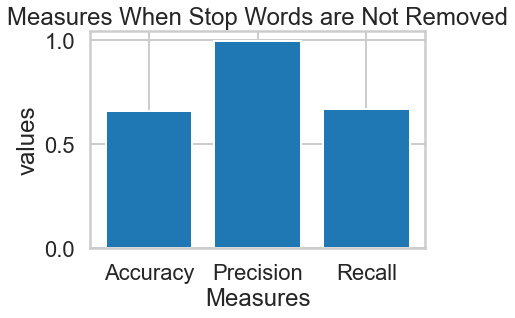

In [82]:
plt.bar(x_axis, y_axis)
plt.title('Measures When Stop Words are Not Removed')
plt.xlabel('Measures')
plt.ylabel('values')
plt.show()

# other plot was made in another notebook

Experiment on the number of words used for training. Filter the dictionary to include only 
words occurring more than k times (1000 words, then k > 100, and k = 50 times). For 
example, the word “offer” appears 150 times, that means that it will be included in the 
dictionary.


For simplicity, I will be testing only on 5 test folders

In [105]:
common_words = top_10000_words[top_10000_words.Count == 50]
common_words

Word  Count
5564           ab   50.0
5565  transmitted   50.0
5566   textffffff   50.0
5567        nasas   50.0
5568         u9fs   50.0
...           ...    ...
5737       grants   50.0
5738    opopspanp   50.0
5739         bddb   50.0
5740     reflects   50.0
5741        affin   50.0

[178 rows x 2 columns]

In [106]:
g2_spam_values = []
g2_ham_values = []

In [107]:
g2_total_spam = 0
g2_total_ham = 0

In [108]:
# iterate through all emails
for folder in training_folders:
    email_files = os.listdir(folder)
    
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='ignore')
        
        # getting email body 
        body = get_email_body(f)
        
        # check if email is ham or spam
        if "spam" in labels[i]:
            spam_or_ham = "spam"
            g2_total_spam = g2_total_spam + 1
        else:
            spam_or_ham = "ham"
            g2_total_ham = g2_total_ham + 1
        
        # an in-loop list that will hold the 0 and 1 values of current email
        email_values = []
        
        # loop through top 10000 common words
        for word in common_words['Word']:
            # check if word is in the email body
            if word in body:
                value = 1
            else:
                value = 0
            
            # add value to the list of values
            email_values.append(value)
        
        # combine the current email values to its respective category
        if spam_or_ham == "spam":
            g2_spam_values.append(email_values)
            #spam_feature_matrix = pd.concat([spam_feature_matrix, email_values], ignore_index = True)
        else:
            g2_ham_values.append(email_values)
            #ham_feature_matrix = pd.concat([ham_feature_matrix, email_values], ignore_index = True)
            
        f.close()

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\017
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000\260
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001\204
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002\156
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\085
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003\264
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004\135
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\019
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005\218
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006\139
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007\082
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\019
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008\272
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009\226
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010\181
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011\124
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012\072
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013\122
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\073
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\013
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015\259
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016\191
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017\151
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018\082
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\021
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\019\269
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\020\164
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\021\102
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\051
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\022\265
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\023\196
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\024\150
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\088
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\025\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\000
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\211
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\212
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\213
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\214
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\215
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\216
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\026\218
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\117
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\118
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\119
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\120
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\027\131
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\045
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\028\278
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\029\206
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\030\142
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\066
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\067
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\068
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\069
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\074
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\031\279
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\032\211
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\033\162
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\106
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\107
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\108
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\109
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\110
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\111
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\112
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\113
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\114
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\115
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\116
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\034\117
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\048
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\035\296
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\036\239
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\037\189
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\121
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\122
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\123
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\124
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\125
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\126
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\127
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\128
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\129
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\130
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\131
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\132
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\133
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\038\138
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\039\098
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\035
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\044
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\293
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\294
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\295
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\296
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\297
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\298
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\040\299
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\006
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\210
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\041\211
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\042\163
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\043\093
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\028
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\029
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\030
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\031
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\032
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\033
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\034
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\035
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\252
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\253
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\254
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\044\265
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\202
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\203
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\204
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\205
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\206
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\207
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\208
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\209
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\045\210
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\046\166
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\047\098
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\021
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\239
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\240
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\241
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\048\248
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\168
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\169
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\170
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\171
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\172
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\049\182
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\050\100
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\027
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\051\276
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\190
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\191
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\192
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\193
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\194
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\195
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\196
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\197
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\198
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\199
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\200
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\201
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\052\202
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\134
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\135
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\136
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\137
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\138
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\139
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\140
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\141
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\142
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\143
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\144
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\145
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\146
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\147
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\148
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\149
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\053\151
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\070
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\054\087
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\019
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\020
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\021
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\022
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\023
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\024
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\025
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\026
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\027
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\028
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\055\286
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\056\237
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\057\167
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\105
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\106
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\058\288
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\217
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\218
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\219
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\220
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\221
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\059\234
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\150
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\060\167
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\103
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\104
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\061\105
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\019
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\239
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\240
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\241
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\242
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\243
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\244
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\245
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\246
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\247
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\248
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\249
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\250
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\251
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\062\252
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\151
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\152
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\153
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\154
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\155
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\156
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\157
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\158
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\159
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\160
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\161
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\162
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\163
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\164
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\165
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\166
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\167
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\063\168
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\090
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\091
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\092
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\093
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\094
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\095
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\096
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\097
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\098
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\099
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\100
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\101
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\102
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\064\103
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\054
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\284
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\285
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\286
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\287
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\288
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\289
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\290
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\291
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\292
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\065\293
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\222
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\223
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\224
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\225
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\226
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\227
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\228
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\229
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\230
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\231
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\232
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\233
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\234
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\235
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\236
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\237
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\238
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\066\239
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\173
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\174
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\175
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\176
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\177
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\178
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\179
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\180
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\181
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\182
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\183
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\184
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\185
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\186
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\187
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\188
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\189
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\067\190
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\053
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\054
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\055
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\056
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\057
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\058
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\059
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\060
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\061
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\062
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\063
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\064
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\065
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\066
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\272
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\273
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\274
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\275
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\276
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\277
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\278
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\279
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\280
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\281
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\282
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\283
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\068\284
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\036
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\037
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\038
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\039
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\040
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\041
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\042
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\043
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\044
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\045
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\046
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\047
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\048
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\049
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\050
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\051
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\052
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\053
D:\UPV\Yea

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\255
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\256
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\257
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\258
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\259
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\260
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\261
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\262
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\263
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\264
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\265
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\266
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\267
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\268
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\269
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\270
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\271
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\070\272
D:\UPV\Yea

In [109]:
g2_spam_feature_matrix = pd.DataFrame(g2_spam_values, columns=common_words['Word'])
g2_ham_feature_matrix = pd.DataFrame(g2_ham_values, columns=common_words['Word'])

In [110]:
g2_spam_vector = g2_spam_feature_matrix.sum()
g2_ham_vector = g2_ham_feature_matrix.sum()

In [111]:
g2_prob_spam_words = pd.DataFrame(columns=['Word', 'Probability'])
g2_prob_ham_words = pd.DataFrame(columns=['Word', 'Probability'])
g2_prob_spam_words.Word = g2_spam_feature_matrix.columns
g2_prob_ham_words.Word = g2_ham_feature_matrix.columns
g2_spam_word_total = g2_spam_feature_matrix.values.sum()
g2_ham_word_total = g2_ham_feature_matrix.values.sum()

In [112]:
probabilities = []
for i in range(len(g2_spam_vector)):
    probability = (g2_spam_vector[i] + 1) / (g2_spam_word_total + len(g2_spam_vector))
    probabilities.append(probability)
    #print(top_10000_words['Word'][i], probability)
g2_prob_spam_words.Probability = probabilities

In [113]:
probabilities = []
for i in range(len(g2_ham_vector)):
    probability = (g2_ham_vector[i] + 1) / (g2_ham_word_total + len(g2_ham_vector))
    probabilities.append(probability)
    #print(top_10000_words['Word'][i], probability)
g2_prob_ham_words.Probability = probabilities

In [114]:
# will accept email MIME files
def classify_email1(file):
    # getting email body 
    body = get_email_body(file)
    
    # cleaning email content
    word_list = clean_data(body)
    word_list = remove_stop_words(word_list)
    
    # make words into lowercase
    word_list = [x.lower() for x in word_list]
    
    final_words = []
    # check which words are found in our word dictionary and only use those
    for word in word_list:
        if word in list(common_words['Word']):
            final_words.append(word)
    
    # calculate if email is spam or ham 
    # summation of log(c) + log(w|c) for all words
    classify_spam = 0
    classify_ham = 0
    for word in final_words:
        # get p(w|S) and p(w|H)
        word_prob_spam = g2_prob_spam_words.loc[g2_prob_spam_words['Word'] == word, 'Probability'].item()
        word_prob_ham = g2_prob_ham_words.loc[g2_prob_ham_words['Word'] == word, 'Probability'].item()
        
        classify_spam = classify_spam + (np.log(prob_spam) + np.log(word_prob_spam))
        classify_ham = classify_ham + (np.log(prob_ham) + np.log(word_prob_ham))
        
    if classify_spam > classify_ham:
        #print("Spam")
        return "Spam"
    elif classify_spam < classify_ham:
        #print("Ham")
        return "Ham"
    # there are emails that cannot be opened because of their encoding, so assume they are spam
    else:
        print("skipped")
        return "Spam"
    
    #print("Spam:", classify_spam)
    #print("Ham:", classify_ham)
    
    
        #word_in_spam = prob_spam_words.loc[df['Word'] == word]
        #print((prob_spam_words.loc[prob_spam_words['Word'] == word, 'Probability'].item()))

In [115]:
g2_test_classification = []
for folder in testing_folders[:5]:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        #print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='ignore')
        
        g2_test_classification.append(classify_email1(body))
        
        f.close()

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\071
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipp

skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\075
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipp

In [116]:
g2_test_labels_real = labels[total_emails:total_emails+1500]
g2_true_positive = 0
g2_true_negative = 0
g2_false_positive = 0
g2_false_negative = 0

In [117]:
for i in range(len(g2_test_classification)):
    #print(test_labels_real)
    if "spam" in g2_test_labels_real[i] and g2_test_classification[i] == "Spam":
        g2_true_positive = g2_true_positive + 1
    elif "spam" in g2_test_labels_real[i] and g2_test_classification[i] == "Ham":
        g2_false_negative = g2_false_negative + 1
    elif "ham" in g2_test_labels_real[i] and g2_test_classification[i] == "Ham":
        g2_true_negative = g2_true_negative + 1
    elif "ham" in g2_test_labels_real[i] and g2_test_classification[i] == "Spam":
        g2_false_positive = g2_false_positive + 1

In [118]:
print(g2_true_positive)
print(g2_true_negative) 
print(g2_false_positive)
print(g2_false_negative)

1001
3
494
2


In [119]:
g2_accuracy = (g2_true_negative + g2_true_positive) / (g2_true_negative + g2_true_positive + g2_false_positive + g2_false_negative)
g2_precision = g2_true_positive / (g2_true_positive + g2_true_negative)
g2_recall = g2_true_positive / (g2_true_positive + g2_false_positive)

In [120]:
print(g2_accuracy, g2_precision, g2_recall)

0.6693333333333333 0.9970119521912351 0.6695652173913044


In [121]:
x_axis = ['Accuracy', 'Precision', 'Recall']
y_axis = [g2_accuracy, g2_precision, g2_recall]

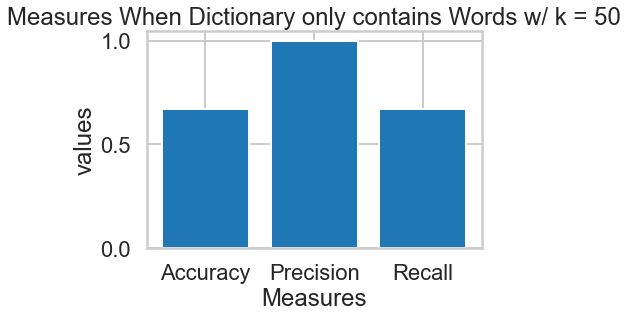

In [122]:
plt.bar(x_axis, y_axis)
plt.title('Measures When Dictionary only contains Words w/ k = 50')
plt.xlabel('Measures')
plt.ylabel('values')
plt.show()


Discuss the results of the different parameters used for Lambda smoothing. Test it on 5 
varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005), Evaluate performance metrics 
for each.

For simplicity, I will be testing on only 5 test folders

What are your recommendations to further improve the model?


To improve the from-scratch model, we should find a way to remove the nonsensical words such as the html code that got converted to strings (ex. tr, td, textplain, contenttype, etc) and email addresses found in an email. We should als find a way to make the model run more efficiently, especially wiht a large number of emails as it takes approx 1-2 hours for the scratch Naive Bayes classifier to run. The data used in the classifier should have been more cleanly extracted or all should have been in the same format and encoding, as there were problems with reading some emails becasue of encoding. 

### -----------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
f = open("D:\\UPV\\Year 4\\CMSC 197 ML\\Lec6-ProblemSet\\data\\000\\131", 'r')
print(f.name)

In [ ]:
from email import policy

In [ ]:
msg = email.message_from_file(f)
print(msg)

In [ ]:
body = msg.get_payload()[0]
body.as_string()

## STEPS
1. Get the data
2. Separate into training and testing sets
3. Get email body of each email
4. For each email body in the training set, drop alphanumeric characters and puctuations, and stop words
5. Separate the trianing set into ham and spam by using the labels file
6. Extract list of most common words in both ham and spam sets along wiht their numner of ocurrences


In [ ]:
message = email.message.EmailMessage(f)
m = message.get_body()
m.get_content_type()